# Modelo 4: Janela Móvel


# Importação de Variáveis e Indicadores

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

btc = pd.read_excel("../wrangled_data/serie_bitcoin.xlsx", index_col = "Data")
variaveis = pd.read_excel("../wrangled_data/variaveis.xlsx", index_col = "Data")

stop_fixo = pd.read_excel("../wrangled_data/stop_fixo.xlsx", index_col = "Data")
stop_vol = pd.read_excel("../wrangled_data/stop_vol.xlsx", index_col = "Data")

# DF original

In [9]:
df = variaveis.join(stop_fixo)
df.drop(["Retorno", "Alvo_Contínuo", "Stop_Long", "Stop_Short"], axis = 1, inplace = True)
df.head()

,AN_INFLATION,END_ATIVOS,HASH_RATE30,FEE_MEAN,MMULT,MRGO140,MRGO28,MVRV,MVRV_Z,THERMOCAP,...,PROP,D0,D1,D2,D3,Z30,RSL,TEND_ALTA,TEND_BAIXA,Alvo_Binário
Data,,,,,,,,,,,,,,,,,,,,,
2011-02-01,-0.036790,1.346414,0.012031,0.392474,3.962088,4.259223,4.472763,5.023446,5.562989,0.000001,...,0.578913,1,1,1,0,1.644952,0.496305,1,0,1
2011-02-02,-0.038023,1.361285,0.010910,0.238807,3.934975,3.738760,4.252111,4.955148,5.412498,0.000001,...,0.085702,1,1,1,1,1.660428,0.431013,1,0,0
2011-02-03,0.011130,1.342658,0.013371,0.104872,3.764052,3.166427,3.801977,4.686634,5.053846,0.000001,...,-0.295465,0,1,1,1,1.677207,0.318935,1,0,1
2011-02-04,0.210286,1.355250,0.018983,0.168706,4.298699,3.752805,4.627094,5.360298,5.914965,0.000002,...,0.508096,1,0,1,1,1.691116,0.427581,1,0,1
2011-02-07,0.144713,1.340026,0.017436,0.149473,4.426032,3.034375,4.279002,5.252936,5.725800,0.000002,...,-0.161603,0,0,1,1,1.730407,0.254542,1,0,1


# Separação Treino Teste

In [10]:
# df contem variaveis, alvo e datas
n = 1000
datas = list(df.index)
n_datas = len(datas)

dfs = []
for i in range(len(datas) - n):
    dfs.append(df.iloc[i:i+n+1, :])
    
print("Quantidade de Obs:", len(datas) - n)

Quantidade de Obs: 1713


In [11]:
# Treino
dfs[1700].iloc[:n]

,AN_INFLATION,END_ATIVOS,HASH_RATE30,FEE_MEAN,MMULT,MRGO140,MRGO28,MVRV,MVRV_Z,THERMOCAP,...,PROP,D0,D1,D2,D3,Z30,RSL,TEND_ALTA,TEND_BAIXA,Alvo_Binário
Data,,,,,,,,,,,,,,,,,,,,,
2017-08-29,0.154909,-0.343096,0.001560,0.023375,2.201759,7.136967,8.291015,3.038754,5.559178,0.000002,...,0.717332,1,1,1,0,1.759571,0.078304,1,0,0
2017-08-30,0.127374,-0.312151,0.006480,0.058377,2.176602,7.008798,8.255757,3.006695,5.477098,0.000002,...,-0.031850,0,1,1,1,1.776579,0.061851,1,0,1
2017-08-31,-0.029881,-0.181999,0.004366,-0.031584,2.233597,7.477037,8.520960,3.066772,5.648410,0.000002,...,0.857661,1,0,1,1,1.799311,0.080618,1,0,1
2017-09-01,0.067344,-0.116327,0.006229,0.011684,2.302336,7.903592,9.098163,3.142498,5.893200,0.000002,...,0.796199,1,1,0,1,1.824149,0.103017,1,0,0
2017-09-05,0.125547,0.038530,0.014146,0.006741,2.001881,6.012312,3.376075,2.787426,4.752599,0.000001,...,0.289460,1,0,0,0,1.875744,-0.029160,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-22,0.055119,-1.500972,0.004832,-0.004164,0.723216,-3.711991,-0.839673,1.670493,1.369264,0.000001,...,0.260498,1,1,0,0,-1.122999,0.019936,0,1,1
2021-07-23,-0.117687,-1.494094,-0.002896,-0.015035,0.749272,-3.554505,0.750608,1.732407,1.496578,0.000001,...,0.827843,1,1,1,0,-1.125278,0.053933,0,1,1
2021-07-26,-0.019657,-1.463698,0.004810,0.010439,0.836862,-3.440574,1.166123,1.930109,1.890377,0.000001,...,0.406904,1,1,1,1,-1.094366,0.137337,0,1,1


In [12]:
# Teste
dfs[1700].tail(1)

,AN_INFLATION,END_ATIVOS,HASH_RATE30,FEE_MEAN,MMULT,MRGO140,MRGO28,MVRV,MVRV_Z,THERMOCAP,...,PROP,D0,D1,D2,D3,Z30,RSL,TEND_ALTA,TEND_BAIXA,Alvo_Binário
Data,,,,,,,,,,,,,,,,,,,,,
2021-07-29,0.019054,-1.32396,0.006627,-0.013257,0.895876,-3.930174,2.353904,2.017407,2.108301,0.000001,...,-0.033869,0,1,1,1,-1.047221,0.130924,0,1,1


# Modelagem

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

In [ ]:
retornos = []
datas = []
for df in dfs:
    train = df.iloc[:n]
    test = df.tail(1)
    
    data_obs = test.index
    X_train = train.drop("Alvo_Binário", axis = 1)
    y_train = train["Alvo_Binário"]
    X_test = test.drop("Alvo_Binário", axis = 1)
    y_test = test["Alvo_Binário"]

    modelo = MLPClassifier(random_state = 42, solver = "sgd", activation = "tanh")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    alvo = stop_fixo.loc[data_obs]["Alvo_Contínuo"]
    ret = np.where(y_pred == 1, alvo, -alvo)
    
    print(ret)
    retornos.append(ret)
    datas.append(data_obs)

In [15]:
datas = [i[0] for i in datas]

In [24]:
(1+np.array(retornos)).cumprod()

array([ 0.97310621,  0.95942166,  0.96484759, ..., 10.20756085,
       10.05070203,  9.76469425])

In [16]:
bt = pd.DataFrame()

bt["retorno_acumulado"] = pd.Series(retornos, index = datas).astype(float)
bt["retorno_acumulado"] = (1+bt["retorno_acumulado"]).cumprod()

bt = bt.join(stop_fixo["Alvo_Contínuo"])
bt["Alvo_Contínuo"] = (1 + bt["Alvo_Contínuo"]).cumprod()
bt

,retorno_acumulado,Alvo_Contínuo
2014-12-08,0.973106,0.973106
2014-12-09,0.959422,0.959422
2014-12-10,0.964848,0.964848
2014-12-11,0.975764,0.975764
2014-12-12,0.970487,0.970487
...,...,...
2021-08-10,9.729889,19.824730
2021-08-11,9.481198,19.318021
2021-08-12,10.207561,20.797991
2021-08-13,10.050702,20.478389


<AxesSubplot:>

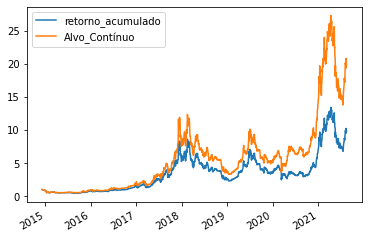

In [18]:
bt.plot()